In [4]:
%matplotlib inline
import cPickle as cp
import numpy as np
import matplotlib.pyplot as plt

memory budget  1024 noise 1e-2
[533048813.5874585, 170043204.68981814, 42584305.96636367, 19237037.925503876, 18839494.330568027, 18839525.212236036]
memory budget  1024 noise 1e-1
[533049757.8700364, 170043250.59338054, 42583945.40549361, 19237010.591693953, 18839437.736591868, 18839666.504153147]
memory budget  1024 noise 1e0
[533048053.69703346, 170043331.75352436, 42583897.053733565, 19237074.712685637, 18839260.66791239, 18839474.550432775]
memory budget  1024 noise 1e1
[533046258.66030294, 170045153.4570963, 42581970.30650829, 19236082.992036767, 18839000.94552081, 18840720.56054702]
memory budget  1024 noise 1e2
[533104239.23333967, 170050843.6653583, 42589054.60476809, 19235796.681675058, 18842899.534694538, 18849419.339441717]
memory budget  1024 noise 1e3
[533961636.1892978, 171139321.4837672, 43638149.22733222, 20258103.220823452, 19826186.706414696, 19880493.178460978]
memory budget  1024 noise 1e4
[638696564.090314, 276760372.2072714, 146928872.75946596, 122346400.34419842

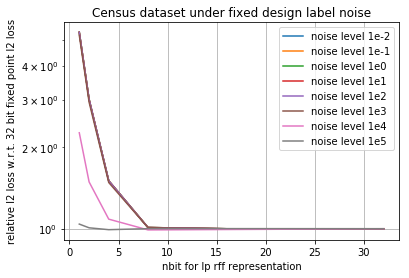

memory budget  4096 noise 1e-2
[174523083.70212355, 58581024.92009558, 18909161.406460598, 5869382.23196311, 4841535.681709429, 4841303.910062584]
memory budget  4096 noise 1e-1
[174523146.24146286, 58581026.64191736, 18909314.258416157, 5869360.507582352, 4841525.855994195, 4841299.622638268]
memory budget  4096 noise 1e0
[174523779.17337337, 58581087.70395208, 18909418.88448217, 5869365.723720957, 4841493.349459541, 4841288.773720603]
memory budget  4096 noise 1e1
[174525010.16057265, 58579339.16450125, 18909817.48409204, 5869094.391733912, 4841719.292507455, 4841224.573792932]
memory budget  4096 noise 1e2
[174519623.93851233, 58579802.68442147, 18929827.12812849, 5882048.3306627255, 4852253.192073141, 4851185.742952102]
memory budget  4096 noise 1e3
[176003660.15469068, 59862138.27094759, 20046236.704575077, 7108866.225324943, 6085787.064733546, 6099024.703042435]
memory budget  4096 noise 1e4
[300496355.89365554, 172768300.61858842, 126540144.51424062, 116779083.09306233, 11617491

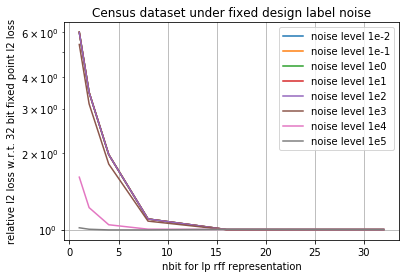

In [15]:
nbit_list = [1, 2, 4, 8, 16, 32]
general_folder = "/Users/Jian/Data/research/lp_kernel/lp_kernel/kernel_reg/multi_seed_results/census_results_64_bit_fixed_design_opt_lambda"
for memory_budget in [1024, 4096]:
    plt.figure()
    for noise in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
        l2_loss_list = []
        for nbit in nbit_list:
            n_lp_rff = int(memory_budget * nbit / float(32) )
            file_name = general_folder + "/lambda__seed_3_n_fp_feat_" \
                + str(n_lp_rff) + "_lp_rff_nbit_" + str(nbit) + "_noise_sigma_" + noise + "/results.pkl"
            with open(file_name, "r") as f:
                res = cp.load(f)
            l2_loss_list.append(res["test_l2_error"])
        print "memory budget ", memory_budget, "noise", noise
#         plt.plot(nbit_list, np.sqrt(l2_loss_list), label="noise level " + noise)
        plt.semilogy(nbit_list, np.sqrt(l2_loss_list) / np.sqrt(l2_loss_list[-1]), label="noise level " + noise)
        print l2_loss_list
    plt.xlabel("nbit for lp rff representation")
    plt.ylabel("relative l2 loss w.r.t. 32 bit fixed point l2 loss")
    plt.title("Census dataset under fixed design label noise")
    plt.grid()
    plt.legend()
    plt.show()

### print out the optimal lambda on servers (noise trade-off script is on dawn8)

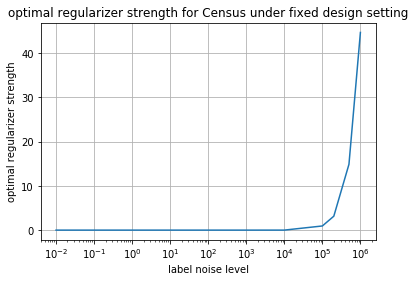

In [21]:
plt.figure()
noise_level = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 2e5, 5e5, 1e6]
lambda_star = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0028540820912806584, 0.9380353525953766, 3.1494819869548825, 14.88207860666723, 44.69821986972829]
plt.semilogx(noise_level, lambda_star)
plt.grid()
plt.legend()
plt.title("optimal regularizer strength for Census under fixed design setting")
plt.ylabel("optimal regularizer strength")
plt.xlabel("label noise level")
plt.show()